# Tokens Budget for final DQ experiments

Para cada dataset
- Extrair dados
- aplicar construçao das prompts
- tokenizer
- stats com os tamanhos

- funções de extract dos datasets
- funções de prompt preds?
    não, pq a prompt pode variar
- começar com as de nli



In [1]:
import os
# set available gpu's
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from evo_functions import extract_SemEval_data, extract_ContractNLI_data, extract_MEDIQASUM_data, extract_LegalSumTOSDR_data, load_model
import numpy as np

/cfs/home/u023967/miniconda3/envs/thesis_env_2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


## SemEval

In [2]:
semeval_data = extract_SemEval_data()
model, tokenizer = load_model(checkpoint="microsoft/Phi-3-mini-4k-instruct")

Used data with already retrieved examples from DATASETS/SemEval_data/dev_w_retrieved.json


Loading checkpoint shards: 100%|██████████| 2/2 [02:24<00:00, 72.41s/it]


Phi-3 selecionado


In [3]:
no_tokens_semeval = []

for ins in semeval_data:

    ins_text = "\n".join(ins['primary_evidence'])
    if 'secondary_evidence' in ins:
        ins_text += '\n'
        ins_text += "\n".join(ins['secondary_evidence'])
    ins_tokenized = tokenizer(ins_text, return_tensors="pt", return_attention_mask=False)

    no_tokens_semeval.append(int(len(ins_tokenized['input_ids'][0])))

In [4]:
no_tokens_semeval = np.array(no_tokens_semeval)

print(f"mean-->{np.mean(no_tokens_semeval)}")
print(f"75th percentile-->{np.percentile(no_tokens_semeval, 25)}")
print(f"25th percentile-->{np.percentile(no_tokens_semeval, 75)}")
print(f"sum-->{np.sum(no_tokens_semeval)}")

mean-->498.85
75th percentile-->211.5
25th percentile-->694.75
sum-->99770


## Contract NLI

In [5]:
contractnli_data = extract_ContractNLI_data()

LOADE
Used data with already retrieved examples from DATASETS/ContractNLI_data/dev_w_retrieved_task_w_2_labels_False.json
filtering out the NotMentioned examples...
Counter({'Entailment': 519, 'Contradiction': 95})


In [6]:
contractnli_data[0].keys()

dict_keys(['text', 'statement', 'label', 'spans', 'spans_index', 'retrieved_sentences'])

In [7]:
no_tokens_contractnli = []

for ins in contractnli_data:

    ins_text = ins['text'] + '\n' + ins['statement'] + "\n".join(ins['retrieved_sentences'])
    ins_tokenized = tokenizer(ins_text, return_tensors="pt", return_attention_mask=False)
    no_tokens_contractnli.append(int(len(ins_tokenized['input_ids'][0])))

In [8]:
no_tokens_contractnli = np.array(no_tokens_contractnli)

print(f"mean-->{np.mean(no_tokens_contractnli)}")
print(f"75th percentile-->{np.percentile(no_tokens_contractnli, 25)}")
print(f"25th percentile-->{np.percentile(no_tokens_contractnli, 75)}")
print(f"sum-->{np.sum(no_tokens_contractnli)}")

mean-->3193.674267100977
75th percentile-->1846.25
25th percentile-->3742.5
sum-->1960916


## MEDIQA

In [9]:
mediqa_data = extract_MEDIQASUM_data()

Used data with already retrieved examples from DATASETS/MEDIQASUM_data/valid_w_retrieved.json


In [10]:
mediqa_data[0].keys()

dict_keys(['dataset', 'encounter_id', 'dialogue', 'note', 'retrieved_example_note'])

In [11]:
no_tokens_mediqa = []

for ins in mediqa_data:

    ins_text = ins['dialogue'] + '\n' + ins['retrieved_example_note']
    ins_tokenized = tokenizer(ins_text, return_tensors="pt", return_attention_mask=False)
    no_tokens_mediqa.append(int(len(ins_tokenized['input_ids'][0])))

In [12]:
no_tokens_mediqa = np.array(no_tokens_mediqa)

print(f"mean-->{np.mean(no_tokens_mediqa)}")
print(f"75th percentile-->{np.percentile(no_tokens_mediqa, 25)}")
print(f"25th percentile-->{np.percentile(no_tokens_mediqa, 75)}")
print(f"sum-->{np.sum(no_tokens_mediqa)}")

mean-->2474.05
75th percentile-->2200.5
25th percentile-->2989.75
sum-->49481


## Legal SUM

In [13]:
legalsum_data = extract_LegalSumTOSDR_data()

Used data with already retrieved examples from DATASETS/LegalSumTOSDR_data/val_w_retrieved.json


In [14]:
legalsum_data[0].keys()

dict_keys(['original_text', 'reference_summary', 'uid'])

In [15]:
no_tokens_legalsum = []

for ins in legalsum_data:

    ins_text = ins['original_text']
    ins_tokenized = tokenizer(ins_text, return_tensors="pt", return_attention_mask=False)
    no_tokens_legalsum.append(int(len(ins_tokenized['input_ids'][0])))

In [16]:
no_tokens_legalsum = np.array(no_tokens_legalsum)

print(f"mean-->{np.mean(no_tokens_legalsum)}")
print(f"75th percentile-->{np.percentile(no_tokens_legalsum, 25)}")
print(f"25th percentile-->{np.percentile(no_tokens_legalsum, 75)}")
print(f"sum-->{np.sum(no_tokens_legalsum)}")

mean-->85.04109589041096
75th percentile-->36.0
25th percentile-->104.0
sum-->6208


## Compiled

In [17]:
print(f"SemEval\n")
print(f"mean-->{np.mean(no_tokens_semeval)}")
print(f"75th percentile-->{np.percentile(no_tokens_semeval, 25)}")
print(f"25th percentile-->{np.percentile(no_tokens_semeval, 75)}")
print(f"sum-->{np.sum(no_tokens_semeval)}")

print(f"\n")

print(f"Contract NLI\n")
print(f"mean-->{np.mean(no_tokens_contractnli)}")
print(f"75th percentile-->{np.percentile(no_tokens_contractnli, 25)}")
print(f"25th percentile-->{np.percentile(no_tokens_contractnli, 75)}")
print(f"sum-->{np.sum(no_tokens_contractnli)}")

print(f"\n")

print(f"MEDIQA\n")
print(f"mean-->{np.mean(no_tokens_mediqa)}")
print(f"75th percentile-->{np.percentile(no_tokens_mediqa, 25)}")
print(f"25th percentile-->{np.percentile(no_tokens_mediqa, 75)}")
print(f"sum-->{np.sum(no_tokens_mediqa)}")

print(f"\n")

print(f"Legalsum\n")
print(f"mean-->{np.mean(no_tokens_legalsum)}")
print(f"75th percentile-->{np.percentile(no_tokens_legalsum, 25)}")
print(f"25th percentile-->{np.percentile(no_tokens_legalsum, 75)}")
print(f"sum-->{np.sum(no_tokens_legalsum)}")

SemEval

mean-->498.85
75th percentile-->211.5
25th percentile-->694.75
sum-->99770


Contract NLI

mean-->3193.674267100977
75th percentile-->1846.25
25th percentile-->3742.5
sum-->1960916


MEDIQA

mean-->2474.05
75th percentile-->2200.5
25th percentile-->2989.75
sum-->49481


Legalsum

mean-->85.04109589041096
75th percentile-->36.0
25th percentile-->104.0
sum-->6208


# Stats

In [18]:
import matplotlib.pyplot as plt

# Create a box plot
plt.boxplot(no_tokens)

# Add labels and title
plt.title("Box Plot of Array Lengths")
plt.ylabel("Value")

# Display the plot
plt.show()


NameError: name 'no_tokens' is not defined

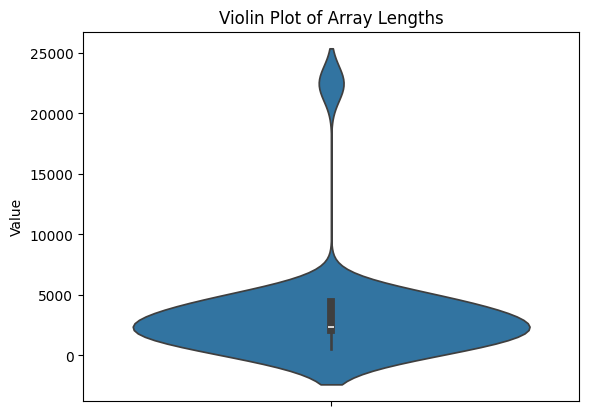

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
sns.violinplot(data=no_tokens)

# Add labels and title
plt.title("Violin Plot of Array Lengths")
plt.ylabel("Value")

# Display the plot
plt.show()


# Datasets Stats for thesis

In [ ]:
val_semeval_data = extract_SemEval_data()
val_contractnli_data = extract_ContractNLI_data()
val_mediqasum_data = extract_MEDIQASUM_data()
val_legalsum_data = extract_LegalSumTOSDR_data()

test_semeval_data = extract_SemEval_data(type='test')
test_contractnli_data = extract_ContractNLI_data(type='test')
test_mediqasum_data = extract_MEDIQASUM_data(type='test')
test_legalsum_data = extract_LegalSumTOSDR_data(type='test')